### Classification Algorithms:

1. Logictic Regression
 
2. Naive Bayes

3. K-Nearest Neighbors

4. Support Vector Machines

5. Decision Tree

6. XGBoost

7. LightGBM

8. Random Forest Classifiers


In [3]:

import numpy  as np
import pandas as pd


from models.classifiers import Classifiers
from models.custom_ml_classifiers import CustomMLClassifiers

import warnings
warnings.filterwarnings('ignore')


In [4]:

# data paths
path_train_baseline = "./data/train_imputed_onehotencoded.csv"


In [5]:

# read data into data frame
df_train = pd.read_csv(path_train_baseline)
df_train.head()


,ID,VAR0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,...,CAT158,CAT159,CAT160,CAT161,CAT162,CAT163,CAT164,CAT165,CAT166,CAT167
0,0,0.799805,0.184174,0.000000,0.000000,0.168984,0.037037,0.000000,0.200195,0.788112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.725049,0.180594,0.000000,0.000000,0.165312,0.090790,0.054237,0.255107,0.722679,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,0.799805,0.199255,0.000000,0.000000,0.167613,0.000000,0.000000,0.200195,0.788112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.677137,0.209870,0.166667,0.181818,0.190511,0.222222,0.125000,0.322863,0.788112,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,0.725049,0.180594,0.000000,0.000000,0.165312,0.000000,0.054237,0.255107,0.722679,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:

col     = "TARGET"
exclude = ["ID"]

# drop excluded columns and target column for X value
X = df_train.drop(exclude + [col], axis=1).values

# get target values
y = df_train[col].values

classifiers  = Classifiers(X, y, test_size=0.20, classifiers = CustomMLClassifiers.list(set_class_weight=True))


Training GAUSSIANNB...
 executed in 0.5 seconds.
Training DecisionTree...
 executed in 1.5 seconds.
Training LogisticReg...
 executed in 1.0 seconds.
Training RandomForest...
 executed in 8.6 seconds.
Training XGBoost...
 executed in 4.4 seconds.
Training LightGBM...
 executed in 0.9 seconds.


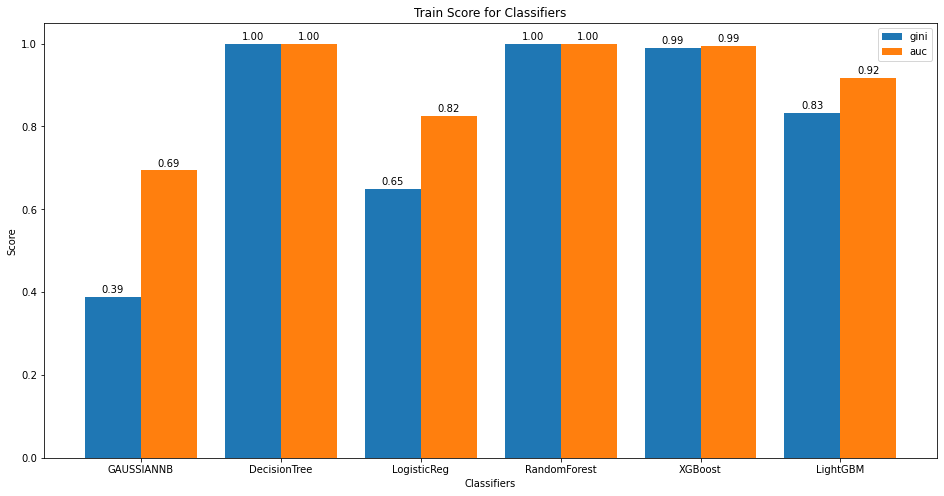

Testing GAUSSIANNB...
 ###### Confusion Matrix #######
[[ 302 5400]
 [  13  285]]
 ###############################
 executed in 0.1 seconds.
Testing DecisionTree...
 ###### Confusion Matrix #######
[[5419  283]
 [ 255   43]]
 ###############################
 executed in 0.0 seconds.
Testing LogisticReg...
 ###### Confusion Matrix #######
[[5690   12]
 [ 288   10]]
 ###############################
 executed in 0.0 seconds.
Testing RandomForest...
 ###### Confusion Matrix #######
[[5701    1]
 [ 297    1]]
 ###############################
 executed in 0.5 seconds.
Testing XGBoost...
 ###### Confusion Matrix #######
[[5371  331]
 [ 224   74]]
 ###############################
 executed in 0.1 seconds.
Testing LightGBM...
 ###### Confusion Matrix #######
[[5700    2]
 [ 295    3]]
 ###############################
 executed in 0.0 seconds.


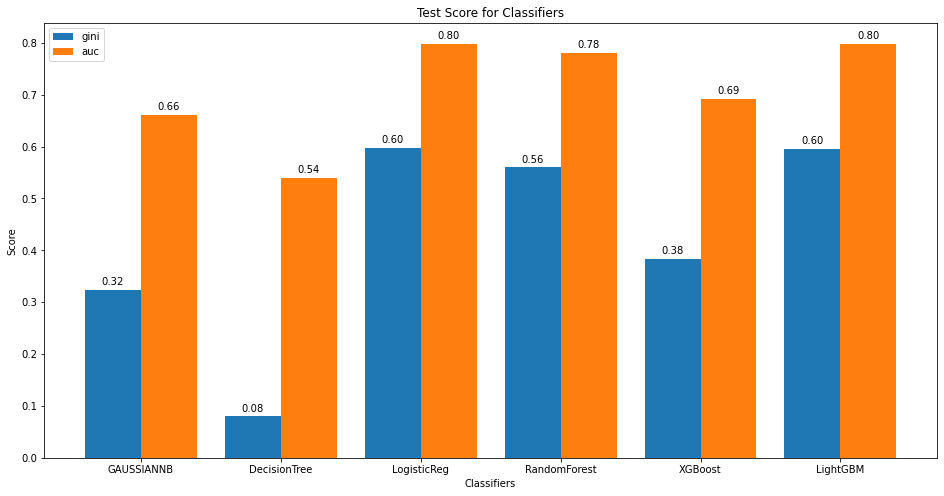

In [7]:

scores_train = classifiers.compare_train(cv=5)
score_test   = classifiers.compare_test()


Hyper parameters search for GAUSSIANNB...Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] END .................var_smoothing=5.15200049189387e-13; total time=   0.2s
[CV] END .................var_smoothing=5.15200049189387e-13; total time=   0.1s
[CV] END ...............var_smoothing=1.1494341498251595e-11; total time=   0.1s
[CV] END ...............var_smoothing=1.1494341498251595e-11; total time=   0.1s
[CV] END ...............var_smoothing=1.1887339829593836e-08; total time=   0.1s
[CV] END ...............var_smoothing=1.1887339829593836e-08; total time=   0.1s
[CV] END ...............var_smoothing=5.3464781574429685e-11; total time=   0.1s
[CV] END ...............var_smoothing=5.3464781574429685e-11; total time=   0.1s
[CV] END ...............var_smoothing=1.1033112720681472e-12; total time=   0.1s
[CV] END ...............var_smoothing=1.1033112720681472e-12; total time=   0.1s
[CV] END ................var_smoothing=7.969201339663828e-12; total time=   0.1s
[CV] E

 ###### Confusion Matrix #######
[[2688 3014]
 [  53  245]]
 ###############################
 executed in 0.1 seconds.
Hyper parameters search for LogisticReg...Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] END C=0.1, fit_intercept=False, max_iter=900, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=900, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=3, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=3, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.3, fit

[CV] END C=0.1, fit_intercept=False, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=1, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=3, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END C=3, fit_intercept=True, max_iter=400, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=1, fit_intercept=False, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=1, fit_intercept=True, max_iter=900, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=1, fit_intercept=True, max_iter=900, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=0.1, fit_intercept=True, max_iter=900, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=900, penalty=l2,

[CV] END bootstrap=True, max_depth=16, max_features=auto, min_samples_leaf=50, n_estimators=550; total time=   9.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=83, n_estimators=850; total time=   9.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=83, n_estimators=850; total time=  12.1s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=40, n_estimators=900; total time=  25.6s
[CV] END bootstrap=False, max_depth=98, max_features=sqrt, min_samples_leaf=40, n_estimators=900; total time=  20.1s
[CV] END bootstrap=False, max_depth=41, max_features=sqrt, min_samples_leaf=88, n_estimators=950; total time=  21.4s
[CV] END bootstrap=False, max_depth=41, max_features=sqrt, min_samples_leaf=88, n_estimators=950; total time=  17.4s
[CV] END bootstrap=False, max_depth=28, max_features=auto, min_samples_leaf=72, n_estimators=750; total time=  14.0s
[CV] END bootstrap=False, max_depth=28, max_features=auto, min_samp

[CV] END gamma=0.0, max_depth=8, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=   3.1s
[CV] END gamma=0.0, max_depth=8, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=   3.1s
[CV] END gamma=0.2, max_depth=4, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=   1.7s
[CV] END gamma=0.2, max_depth=4, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=   1.7s
[CV] END gamma=0.0, max_depth=2, min_child_weight=1, objective=binary:logistic, use_label_encoder=False; total time=   1.0s
[CV] END gamma=0.0, max_depth=2, min_child_weight=1, objective=binary:logistic, use_label_encoder=False; total time=   1.1s
[CV] END gamma=0.1, max_depth=4, min_child_weight=3, objective=binary:logistic, use_label_encoder=False; total time=   2.1s
[CV] END gamma=0.1, max_depth=4, min_child_weight=3, objective=binary:logistic, use_label_encoder=False; total time=   2.0s
[CV] END

[CV] END gamma=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, use_label_encoder=False; total time=   2.9s
[CV] END gamma=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, use_label_encoder=False; total time=   3.0s
[CV] END gamma=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, use_label_encoder=False; total time=   3.0s
[CV] END gamma=0.1, max_depth=4, min_child_weight=1, objective=binary:logistic, use_label_encoder=False; total time=   2.1s
[CV] END gamma=0.1, max_depth=4, min_child_weight=1, objective=binary:logistic, use_label_encoder=False; total time=   2.1s
[CV] END gamma=0.4, max_depth=6, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=   2.9s
[CV] END gamma=0.4, max_depth=6, min_child_weight=5, objective=binary:logistic, use_label_encoder=False; total time=   2.7s
[CV] END gamma=0.3, max_depth=8, min_child_weight=3, objective=binary:logistic, use_label_encoder=False; total time=   3.2s
[CV] END

[CV] END criterion=entropy, max_depth=92, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=64, max_features=auto, min_samples_leaf=22, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=64, max_features=auto, min_samples_leaf=22, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=36, max_features=sqrt, min_samples_leaf=74, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=36, max_features=sqrt, min_samples_leaf=74, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=98, max_features=sqrt, min_samples_leaf=56, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=98, max_features=sqrt, min_samples_leaf=56, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=80, ma

[CV] END boosting_type=gbdt, learning_rate=0.2, max_depth=20, metric=auc, min_child_samples=5, num_boost_round=70, num_leaves=80, objective=binary, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Warning] num_iterations is set=40, num_boost_round=40 will be ignored. Current value: num_iterations=40
[CV] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, metric=auc, min_child_samples=15, num_boost_round=40, num_leaves=60, objective=binary, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Warning] num_iterations is set=40, num_boost_round=40 will be ignored. Current value: num_iterations=40
[CV] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, metric=auc, min_child_samples=15, num_boost_round=40, num_leaves=60, objective=binary, reg_alpha=0.03; total time=   0.1s
[LightGBM] [Warning] num_iterations is set=50, num_boost_round=50 will be ignored. Current value: num_iterations=50
[CV] END boosting_type=gbdt, learning_rate=0.2, max_depth=-1, metric=auc, min_child_samples=10, num_boo

[CV] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, metric=auc, min_child_samples=15, num_boost_round=90, num_leaves=60, objective=binary, reg_alpha=0.01; total time=   0.1s
[LightGBM] [Warning] num_iterations is set=70, num_boost_round=70 will be ignored. Current value: num_iterations=70
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, metric=auc, min_child_samples=5, num_boost_round=70, num_leaves=40, objective=binary, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Warning] num_iterations is set=70, num_boost_round=70 will be ignored. Current value: num_iterations=70
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, metric=auc, min_child_samples=5, num_boost_round=70, num_leaves=40, objective=binary, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Warning] num_iterations is set=30, num_boost_round=30 will be ignored. Current value: num_iterations=30
[CV] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, metric=auc, min_child_samples=5, num_boo

[CV] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, metric=auc, min_child_samples=5, num_boost_round=60, num_leaves=80, objective=binary, reg_alpha=0; total time=   0.1s
[LightGBM] [Warning] num_iterations is set=90, num_boost_round=90 will be ignored. Current value: num_iterations=90
[CV] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, metric=auc, min_child_samples=15, num_boost_round=90, num_leaves=40, objective=binary, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Warning] num_iterations is set=90, num_boost_round=90 will be ignored. Current value: num_iterations=90
[CV] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, metric=auc, min_child_samples=15, num_boost_round=90, num_leaves=40, objective=binary, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Warning] num_iterations is set=60, num_boost_round=60 will be ignored. Current value: num_iterations=60
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, metric=auc, min_child_samples=5, num_boost_r

[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=5, metric=auc, min_child_samples=5, num_boost_round=90, num_leaves=100, objective=binary, reg_alpha=0; total time=   0.2s
[LightGBM] [Warning] num_iterations is set=70, num_boost_round=70 will be ignored. Current value: num_iterations=70
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=-1, metric=auc, min_child_samples=10, num_boost_round=70, num_leaves=100, objective=binary, reg_alpha=0.03; total time=   0.5s
[LightGBM] [Warning] num_iterations is set=70, num_boost_round=70 will be ignored. Current value: num_iterations=70
[CV] END boosting_type=gbdt, learning_rate=0.05, max_depth=-1, metric=auc, min_child_samples=10, num_boost_round=70, num_leaves=100, objective=binary, reg_alpha=0.03; total time=   0.5s
[LightGBM] [Warning] num_iterations is set=60, num_boost_round=60 will be ignored. Current value: num_iterations=60
[CV] END boosting_type=gbdt, learning_rate=0.1, max_depth=-1, metric=auc, min_child_samples=10, num

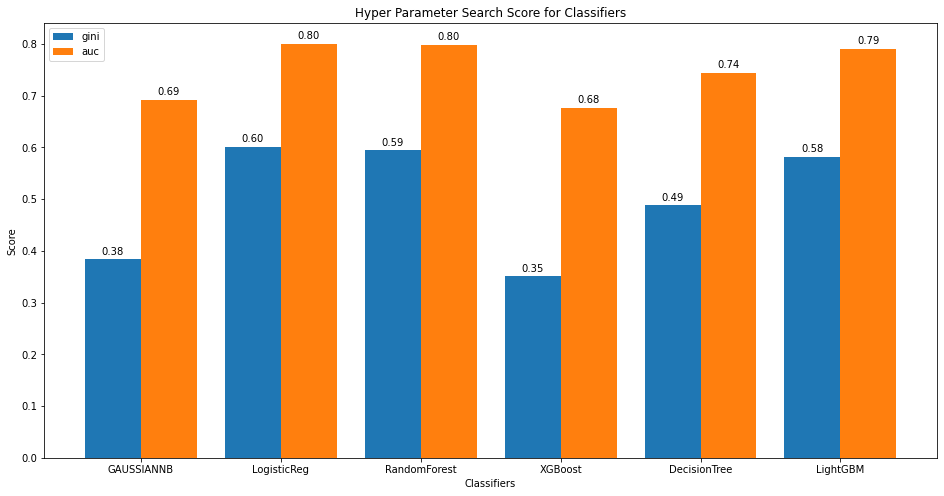

Testing GAUSSIANNB...
 ###### Confusion Matrix #######
[[2688 3014]
 [  53  245]]
 ###############################
 executed in 0.1 seconds.
Testing DecisionTree...
 ###### Confusion Matrix #######
[[5702    0]
 [ 298    0]]
 ###############################
 executed in 0.0 seconds.
Testing LogisticReg...
 ###### Confusion Matrix #######
[[5697    5]
 [ 291    7]]
 ###############################
 executed in 0.0 seconds.
Testing RandomForest...
 ###### Confusion Matrix #######
[[5702    0]
 [ 298    0]]
 ###############################
 executed in 1.4 seconds.
Testing XGBoost...
 ###### Confusion Matrix #######
[[5580  122]
 [ 259   39]]
 ###############################
 executed in 0.0 seconds.
Testing LightGBM...
 ###### Confusion Matrix #######
[[5702    0]
 [ 297    1]]
 ###############################
 executed in 0.0 seconds.


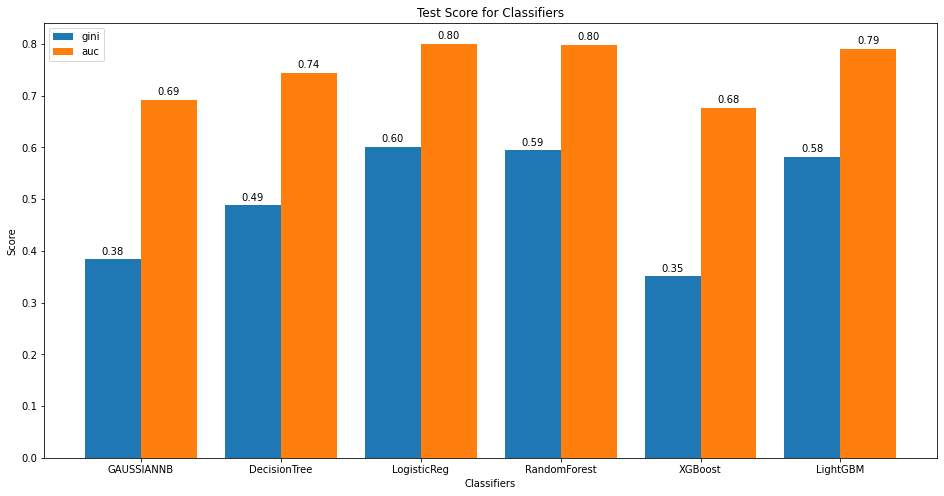

In [8]:

scores_train = classifiers.hyperparams_search(n_iter=50, cv=2)
score_test   = classifiers.compare_test()
